In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [15]:
df=pd.read_csv('dataset_target.csv',index_col=0)
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<AxesSubplot:xlabel='Date'>

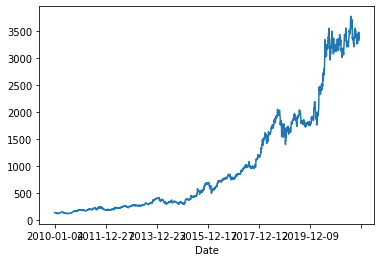

In [16]:
df['High'].plot()

<AxesSubplot:xlabel='Date'>

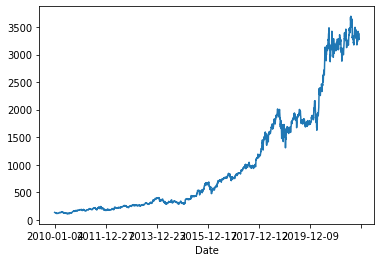

In [17]:
df['Low'].plot()

<AxesSubplot:xlabel='Date'>

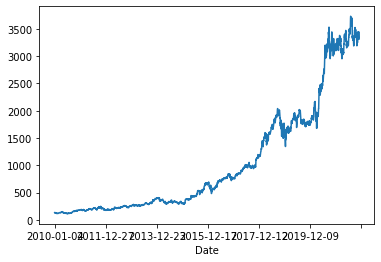

In [18]:
df['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

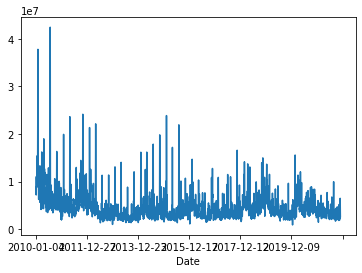

In [19]:
df['Volume'].plot()

<AxesSubplot:xlabel='Date'>

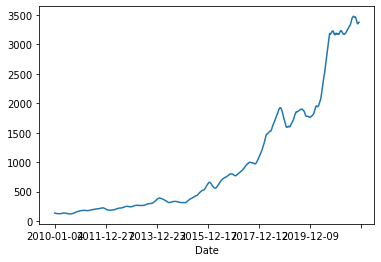

In [20]:
## We are taking 50 moving average
## That is a total of 50 days data

df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()
df['Moving_av'].plot()

In [21]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close

<AxesSubplot:xlabel='Date'>

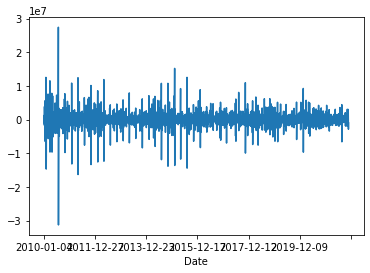

In [22]:
df['Increase_in_vol'].plot()

<AxesSubplot:xlabel='Date'>

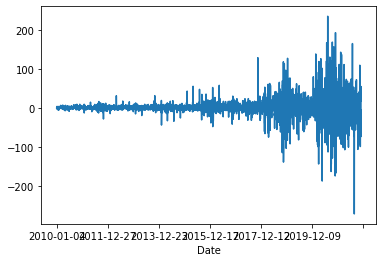

In [23]:
df['Increase_in_adj_close'].plot()

In [24]:
df.to_csv("dataset_target_2.csv",index=False)

In [25]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')

In [26]:
df=pd.read_csv('stock_details/AMZN.csv')

In [27]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [28]:
Dates=[]
i=0
while i<len(df):
		Dates.append(df.iloc[i]['Date'])
		i+=1

In [29]:

df2=pd.read_csv('dataset_target_2.csv')
df2['Date']=Dates
df2.to_csv("dataset_target_2.csv",index=False)

In [30]:
df=pd.read_csv('Dataset_main.csv')
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Moving_av', 'Increase_in_vol', 'Increase_in_adj_close',
       ...
       'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL'],
      dtype='object', length=507)

C:\Users\Artem\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


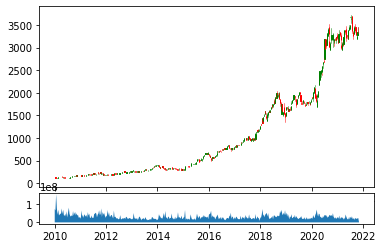

In [31]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('stock_details/AMZN.csv',index_col=0,parse_dates=True)
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

In [32]:
df1=pd.read_csv('dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [33]:
df2=pd.read_csv('dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'Date'],
      dtype='object')


In [34]:
df3=pd.read_csv('Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Moving_av', 'Increase_in_vol', 'Increase_in_adj_close',
       ...
       'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL'],
      dtype='object', length=507)


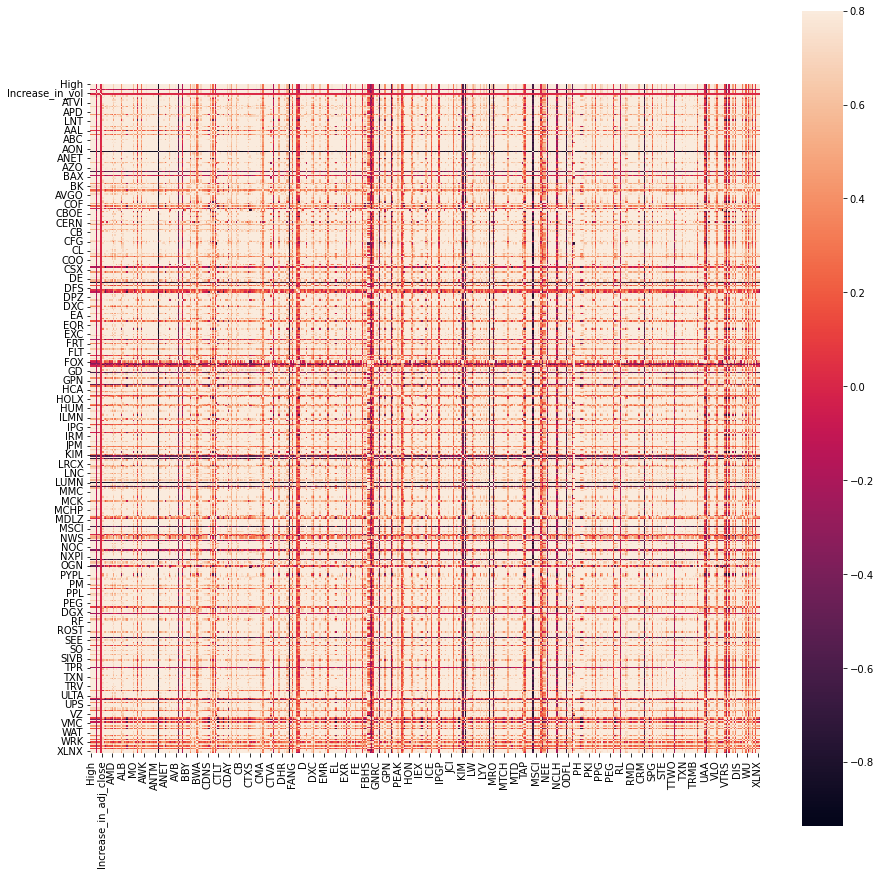

In [35]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [36]:
#df3.hist(figsize = (35,35))
#plt.show()

In [37]:
df.fillna(0, inplace=True)
y_df=df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [38]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)
y_df_mod.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [39]:
Drop_cols=col_y
Drop_cols=Drop_cols.tolist()
Drop_cols.append('Date')
X_df=df3.drop(Drop_cols,axis=1)
X_df.fillna(0, inplace=True)
X_df.columns

Index(['Moving_av', 'Increase_in_vol', 'Increase_in_adj_close', 'MMM', 'ABT',
       'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       ...
       'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL'],
      dtype='object', length=500)

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
x=X_df.values
y=y_df_mod.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#print(X_df.isnull().any())
#print(y_df_mod.isnull().any())
#print(np.shape(X_train))
#print(np.shape(X_test))
#print(y_train)
#print(y_test)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 500, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [42]:

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=500)

C:\Users\Artem\AppData\Local\Temp/ipykernel_10728/2409262813.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=500)


In [43]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16819150616619822581
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6296698880
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4684404215350377963
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [21]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [47]:
import tensorflow as tf
with tf.device('/cpu:0'):
#with tf.device('/device:GPU:0'):
    callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                               monitor='mean_absolute_error',
                                               verbose=0,
                                               save_best_only=True,
                                               save_weights_only=False,
                                               mode='auto')
    results=regressor.fit(X_train,y_train,callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                16032     
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 60,516
Trainable params: 60,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
131/131 [=============================

In [48]:
y_pred= regressor.predict(X_test)
print(y_pred)

[[ 195.97879  191.74557  194.18056  195.32063]
 [ 360.43317  352.7836   357.2051   359.21747]
 [ 159.85757  154.34845  157.38953  157.36304]
 ...
 [3119.2358  3031.2502  3080.3816  3086.428  ]
 [2685.8164  2608.7886  2652.008   2656.3528 ]
 [ 331.5704   322.1531   327.5381   328.16006]]


In [49]:
print(y_test)

[[ 219.63000488  212.80999756  219.41000366  213.8500061 ]
 [ 387.80999756  381.20999146  383.51000977  385.10998535]
 [ 139.44000244  136.11000061  137.19999695  137.49000549]
 ...
 [3250.85009766 3130.         3144.         3149.84008789]
 [2620.         2576.         2620.         2615.27001953]
 [ 329.44000244  319.55999756  324.17001343  328.20999146]]


In [50]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

# High

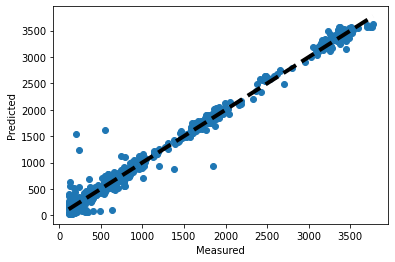

In [51]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Low

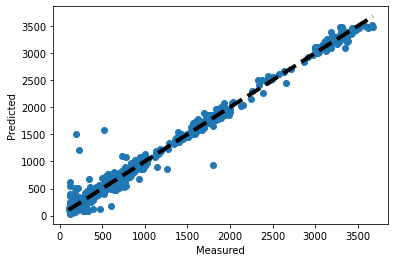

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Applying RNN

In [1]:
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:

df1=pd.read_csv('dataset_target.csv')
print(df1.head())

         Date        High         Low        Open       Close    Volume  \
0  2010-01-04  136.610001  133.139999  136.250000  133.899994   7599900   
1  2010-01-05  135.479996  131.809998  133.429993  134.690002   8851900   
2  2010-01-06  134.729996  131.649994  134.600006  132.250000   7178800   
3  2010-01-07  132.320007  128.800003  132.009995  130.000000  11030200   
4  2010-01-08  133.679993  129.029999  130.559998  133.520004   9830500   

    Adj Close  
0  133.899994  
1  134.690002  
2  132.250000  
3  130.000000  
4  133.520004  


In [3]:
df2=pd.read_csv('dataset_target_2.csv')
print(df2.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
1  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
2  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
3  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   
4  133.679993  129.029999  130.559998  133.520004   9830500  133.520004   

    Moving_av  Increase_in_vol  Increase_in_adj_close        Date  
0  133.899994              0.0               0.000000  2010-01-04  
1  134.294998        1252000.0               0.790009  2010-01-05  
2  133.613332       -1673100.0              -2.440002  2010-01-06  
3  132.709999        3851400.0              -2.250000  2010-01-07  
4  132.872000       -1199700.0               3.520004  2010-01-08  


In [4]:
df_main=df2.drop(['Date'],axis=1)
print(df_main.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
1  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
2  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
3  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   
4  133.679993  129.029999  130.559998  133.520004   9830500  133.520004   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  133.899994              0.0               0.000000  
1  134.294998        1252000.0               0.790009  
2  133.613332       -1673100.0              -2.440002  
3  132.709999        3851400.0              -2.250000  
4  132.872000       -1199700.0               3.520004  


In [5]:
print(len(df_main))

2980


In [6]:
df_train=df_main[:2200]
print(df_train.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
1  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
2  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
3  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   
4  133.679993  129.029999  130.559998  133.520004   9830500  133.520004   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  133.899994              0.0               0.000000  
1  134.294998        1252000.0               0.790009  
2  133.613332       -1673100.0              -2.440002  
3  132.709999        3851400.0              -2.250000  
4  132.872000       -1199700.0               3.520004  


In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
df_target=df_train[['High','Low','Open','Close']]
target_set=df_target.values
train_set=df_train.values

training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)

(2150, 50, 9)


In [8]:
print(y_train.shape)

(2150, 4)


In [9]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 9)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [10]:
RNN_model=model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            18944     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 batch_normalization (BatchN  (None, 50, 64)           256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 50, 64)           256       
 hNormalization)                                        

In [13]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
#with tf.device('/cpu:0'):

  callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',  
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
  RNN_model.fit(X_train, y_train, epochs = 500, batch_size = 32,callbacks=[callback])

Epoch 1/500
68/68 [==============================] - 1s 21ms/step - loss: 0.0064 - accuracy: 0.2572 - mean_squared_error: 0.0064
Epoch 2/500
68/68 [==============================] - 1s 21ms/step - loss: 0.0056 - accuracy: 0.2512 - mean_squared_error: 0.0056
Epoch 3/500
68/68 [==============================] - 2s 24ms/step - loss: 0.0053 - accuracy: 0.2842 - mean_squared_error: 0.0053
Epoch 4/500
68/68 [==============================] - 2s 27ms/step - loss: 0.0044 - accuracy: 0.2935 - mean_squared_error: 0.0044
Epoch 5/500
68/68 [==============================] - 1s 19ms/step - loss: 0.0050 - accuracy: 0.2907 - mean_squared_error: 0.0050
Epoch 6/500
68/68 [==============================] - 1s 19ms/step - loss: 0.0049 - accuracy: 0.2660 - mean_squared_error: 0.0049
Epoch 7/500
68/68 [==============================] - 1s 20ms/step - loss: 0.0042 - accuracy: 0.2842 - mean_squared_error: 0.0042
Epoch 8/500
68/68 [==============================] - 1s 21ms/step - loss: 0.0060 - accuracy: 0.28

In [14]:
df_test=df_main[2200:]

In [15]:
df_target_test=df_test[['High','Low','Open','Close']]

In [16]:
target_set_test=df_target_test.values
test_set=df_test.values
test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)


In [17]:

X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)


In [18]:
predicted_stock_price = RNN_model.predict(X_test)

In [19]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
predicted_stock_price

array([[1911.0508, 1827.0286, 1875.0837, 1864.6476],
       [1915.0156, 1831.0483, 1879.0559, 1868.6263],
       [1926.4225, 1842.6211, 1890.5099, 1880.1038],
       ...,
       [3692.1873, 3610.3145, 3639.5222, 3644.036 ],
       [3681.7612, 3596.1096, 3627.9702, 3633.0032],
       [3671.2202, 3583.3352, 3616.7632, 3621.9482]], dtype=float32)

## High

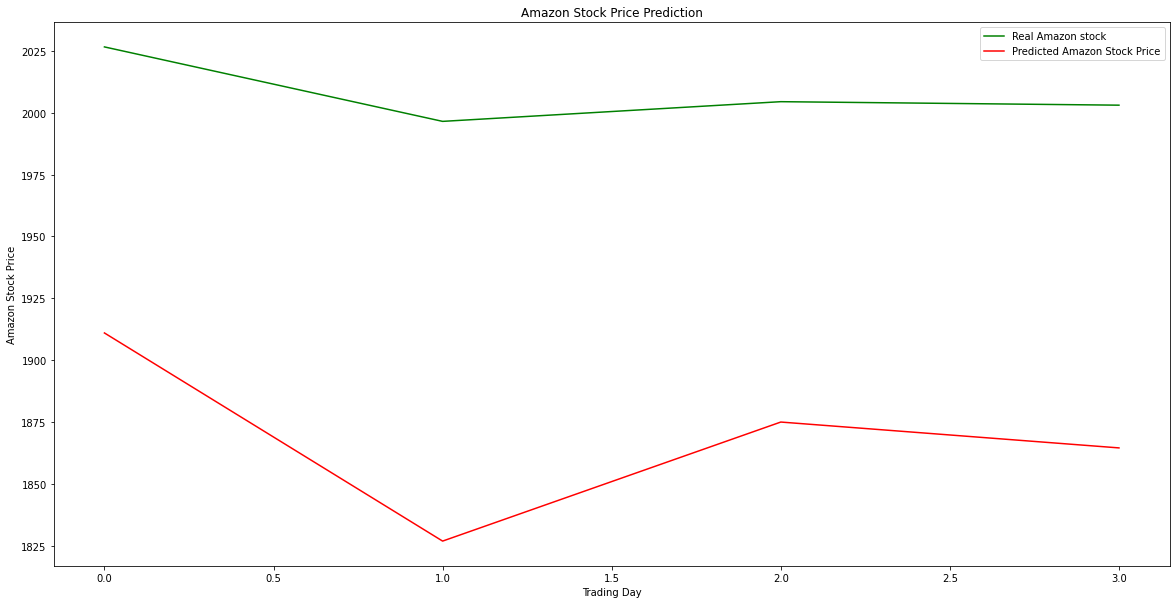

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(target_set_test[0], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[0], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

## Low

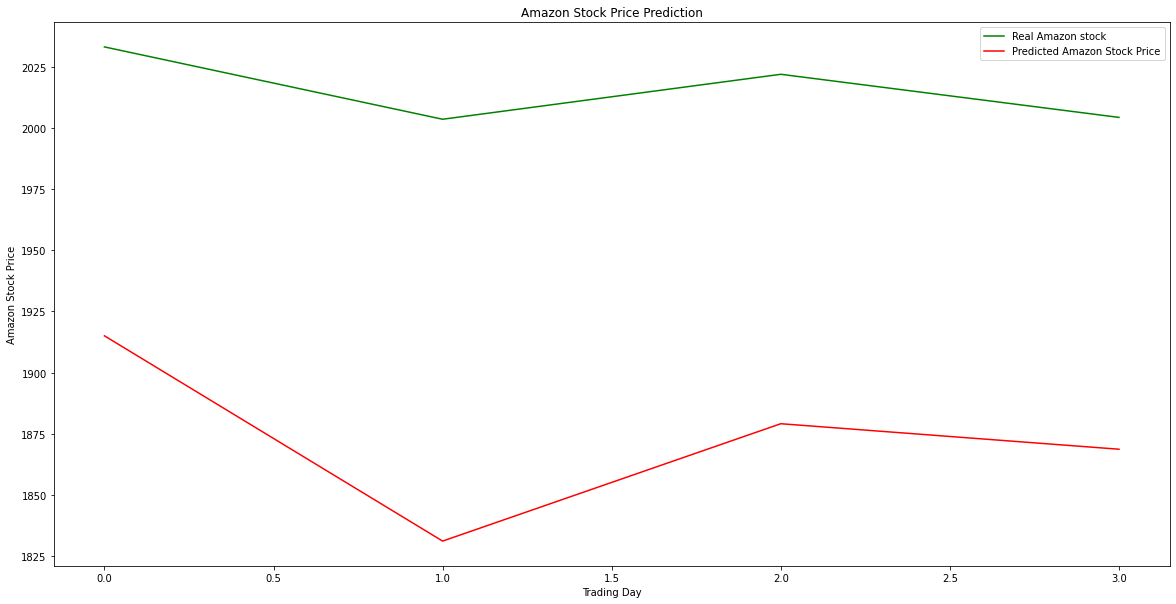

In [23]:

plt.figure(figsize=(20,10))
plt.plot(target_set_test[1], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[1], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

## Open

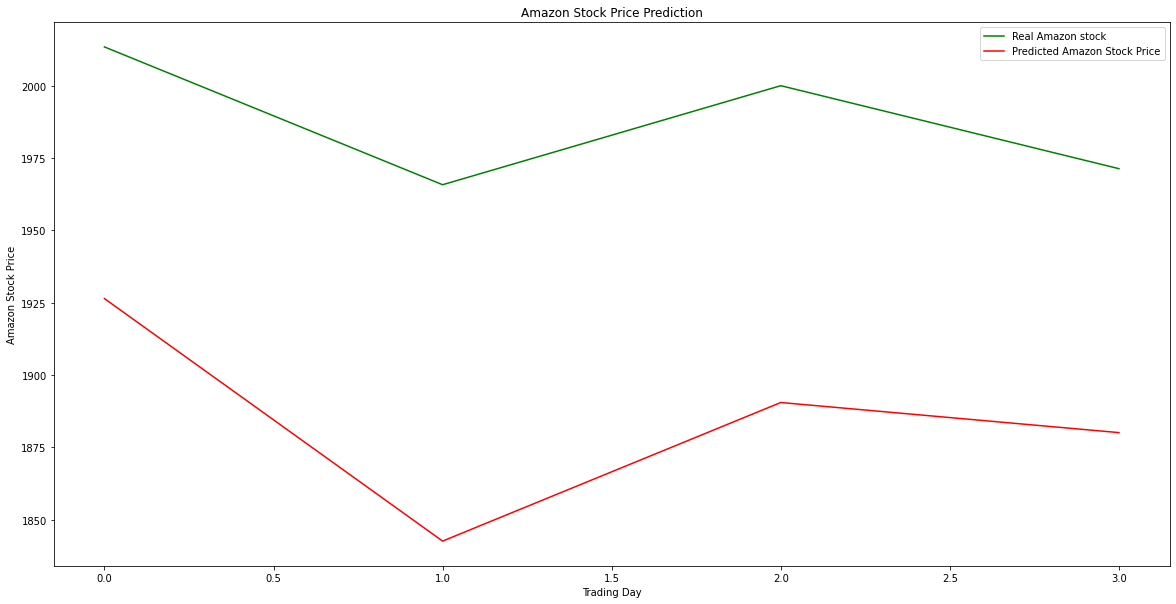

In [24]:

plt.figure(figsize=(20,10))
plt.plot(target_set_test[2], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[2], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

## Close

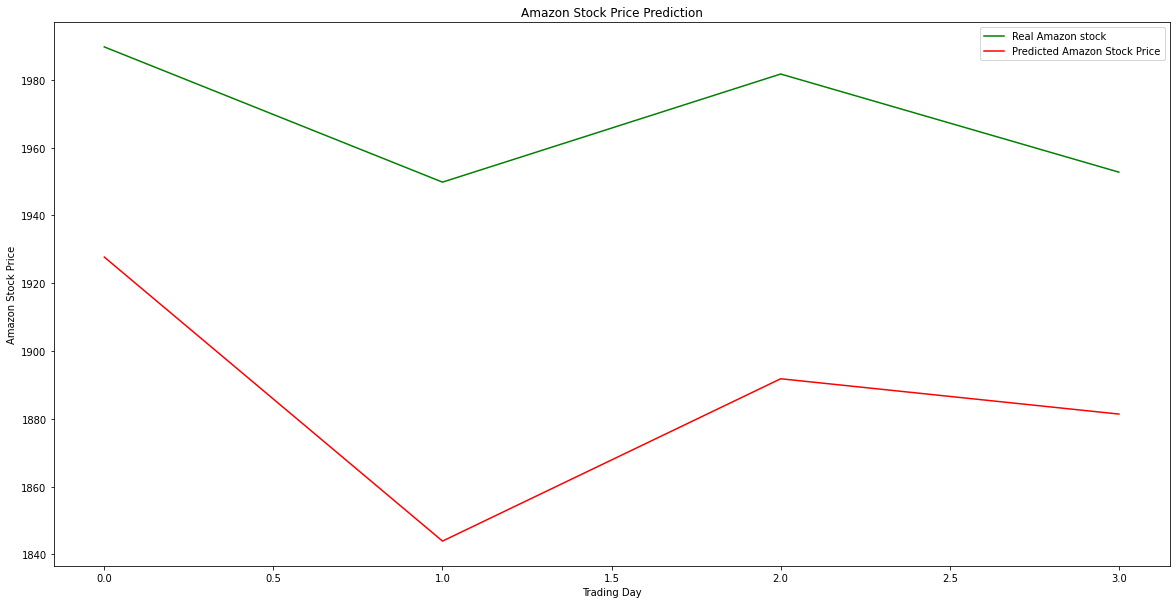

In [25]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test[3], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[3], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

## All Over

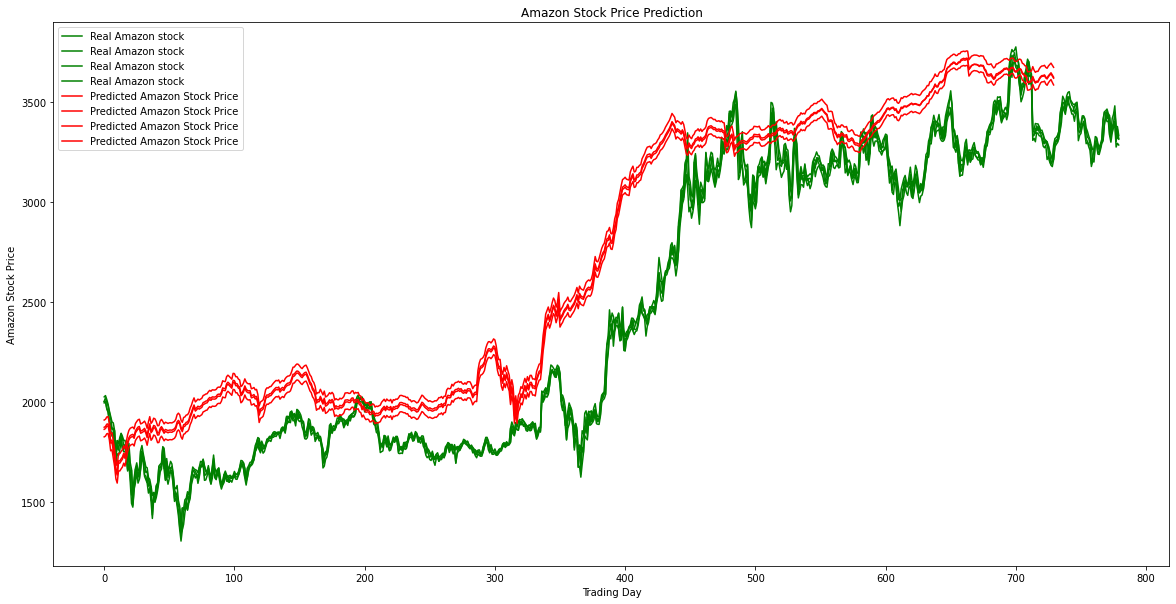

In [26]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test, color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [27]:
import pandas as pd
df1=pd.read_csv("dataset_target_2.csv")
df2=pd.read_csv("dataset_target.csv")
df3=pd.read_csv('Dataset_main.csv')


In [29]:
df3.fillna(0, inplace=True)
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [30]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)
Drop_cols=col_y
Drop_cols=Drop_cols.tolist()
Drop_cols.append('Date')

In [31]:
X_df=df3.drop(Drop_cols,axis=1)
X=X_df.values

In [32]:
saved_model_regressor=tf.keras.models.load_model('Regressor_model.h5')
Regressor_prediction=saved_model_regressor(X)
Regressor_prediction

<tf.Tensor: shape=(2980, 4), dtype=float32, numpy=
array([[ 134.80757,  131.74612,  133.35858,  133.03642],
       [ 153.79773,  150.33255,  152.1783 ,  151.77806],
       [ 111.15365,  108.3234 ,  109.72402,  109.42877],
       ...,
       [3523.4424 , 3461.4875 , 3493.7122 , 3490.3503 ],
       [3274.1147 , 3217.1152 , 3246.7393 , 3243.9368 ],
       [3399.1472 , 3339.7053 , 3370.598  , 3367.55   ]], dtype=float32)>

In [33]:
Regressor_prediction.shape

TensorShape([2980, 4])

In [34]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(Regressor_prediction)):
        y_pred_temp.append(Regressor_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))

In [35]:
y_pred_mod

[array([ 134.80757,  153.79773,  111.15365, ..., 3523.4424 , 3274.1147 ,
        3399.1472 ], dtype=float32),
 array([ 131.74612,  150.33255,  108.3234 , ..., 3461.4875 , 3217.1152 ,
        3339.7053 ], dtype=float32),
 array([ 133.35858,  152.1783 ,  109.72402, ..., 3493.7122 , 3246.7393 ,
        3370.598  ], dtype=float32),
 array([ 133.03642,  151.77806,  109.42877, ..., 3490.3503 , 3243.9368 ,
        3367.55   ], dtype=float32)]

In [37]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_regress','Low_regress','Open_regress','Close_regress'])
Y_pred.head()

,High_regress,Low_regress,Open_regress,Close_regress
0,134.807571,131.746124,133.358582,133.036423
1,153.797729,150.332550,152.178299,151.778061
2,111.153648,108.323402,109.724022,109.428772
3,233.657776,230.830215,232.669891,232.868515
4,118.467705,115.571800,117.036224,116.734161


In [38]:
Y_pred.to_csv('Regressor_results.csv',index=False)

In [57]:
df_main=df1.drop(['Date'],axis=1)
main_set=df_main.values
print(df_main)


             High          Low         Open        Close    Volume  \
0      136.610001   133.139999   136.250000   133.899994   7599900   
1      135.479996   131.809998   133.429993   134.690002   8851900   
2      134.729996   131.649994   134.600006   132.250000   7178800   
3      132.320007   128.800003   132.009995   130.000000  11030200   
4      133.679993   129.029999   130.559998   133.520004   9830500   
...           ...          ...          ...          ...       ...   
2975  3437.000000  3371.449951  3388.000000  3392.489990   2702200   
2976  3479.000000  3386.000000  3402.100098  3446.570068   5708700   
2977  3374.820068  3273.320068  3300.020020  3372.429932   6469500   
2978  3375.860107  3292.020020  3361.800049  3318.110107   3608900   
2979  3331.120117  3283.550049  3315.010010  3312.750000   2627600   

        Adj Close    Moving_av  Increase_in_vol  Increase_in_adj_close  
0      133.899994   133.899994              0.0               0.000000  
1      134.69

In [64]:
#main_set_scaled = sc.transform(main_set)

ValueError: X has 9 features, but MinMaxScaler is expecting 4 features as input.

In [65]:
X_test = []

for i in range(50,len(main_set)):
    X_test.append(main_set[i-50:i,:])
    
X_test = np.array(X_test)

In [66]:
saved_model_RNN=tf.keras.models.load_model('RNN_model.h5')

In [67]:

RNN_prediction=RNN_model.predict(X_test)

In [68]:
len(RNN_prediction)

2930

In [69]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(RNN_prediction)):
        y_pred_temp.append(RNN_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))

In [70]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_RNN','Low_RNN','Open_RNN','Close_RNN'])

In [71]:
Y_pred.to_csv('RNN_results.csv',index=False)

In [72]:
df1=pd.read_csv('Regressor_results.csv')
df2=pd.read_csv('RNN_results.csv')

In [73]:
df1=df1[50:]
df1.to_csv('Regressor_results_mod.csv',index=False)

In [80]:
df1=pd.read_csv('Regressor_results_mod.csv')
print(df2.head)

<bound method NDFrame.head of       High_RNN   Low_RNN  Open_RNN  Close_RNN
0     0.315870  0.316247  0.316088   0.313587
1     0.121169  0.119845  0.123301   0.119496
2     0.067027  0.066911  0.073356   0.068583
3    -0.037367 -0.038202 -0.033328  -0.037136
4    -0.002692 -0.004457 -0.001348  -0.004144
...        ...       ...       ...        ...
2925  0.383743  0.385636  0.391697   0.386612
2926  0.695757  0.697620  0.695041   0.693910
2927  0.497365  0.500192  0.501498   0.498549
2928  0.569017  0.571499  0.569246   0.567824
2929  0.151974  0.152843  0.159057   0.154274

[2930 rows x 4 columns]>


In [81]:
df=pd.concat([df1,df2],axis=1)

In [82]:

df.head()

,High_regress,Low_regress,Open_regress,Close_regress,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,142.62051,139.34279,141.06578,140.698490,0.315870,0.316247,0.316088,0.313587
1,149.10117,145.68532,147.48800,147.094000,0.121169,0.119845,0.123301,0.119496
2,234.52483,231.67267,233.51877,233.718490,0.067027,0.066911,0.073356,0.068583
3,83.24140,80.25225,80.81318,82.215866,-0.037367,-0.038202,-0.033328,-0.037136
4,123.71049,120.67817,122.21424,121.884155,-0.002692,-0.004457,-0.001348,-0.004144


In [83]:
df1=pd.read_csv("dataset_target_2.csv")

In [84]:

target_high=[]
target_low=[]
i=50
while i<len(df1):
    target_high.append(df1.iloc[i]['High'])
    target_low.append(df1.iloc[i]['Low'])
    i+=1

In [85]:
len(target_high)

2930

In [87]:
df['Target_high']=target_high
df['Target_low']=target_low

df.to_csv('feature.csv',index=False)

In [88]:

df_main=pd.read_csv('feature.csv')

print(df_main.head())

   High_regress  Low_regress  Open_regress  Close_regress  High_RNN   Low_RNN  \
0     142.62051    139.34279     141.06578     140.698490  0.315870  0.316247   
1     149.10117    145.68532     147.48800     147.094000  0.121169  0.119845   
2     234.52483    231.67267     233.51877     233.718490  0.067027  0.066911   
3      83.24140     80.25225      80.81318      82.215866 -0.037367 -0.038202   
4     123.71049    120.67817     122.21424     121.884155 -0.002692 -0.004457   

   Open_RNN  Close_RNN  Target_high  Target_low  
0  0.316088   0.313587   132.690002  131.220001  
1  0.123301   0.119496   132.850006  130.440002  
2  0.073356   0.068583   133.710007  129.660004  
3 -0.033328  -0.037136   130.960007  128.639999  
4 -0.001348  -0.004144   130.940002  128.070007  


In [89]:
X_Df=df_main[['High_regress','Low_regress','Open_regress','Close_regress','High_RNN','Low_RNN','Open_RNN','Close_RNN']].values

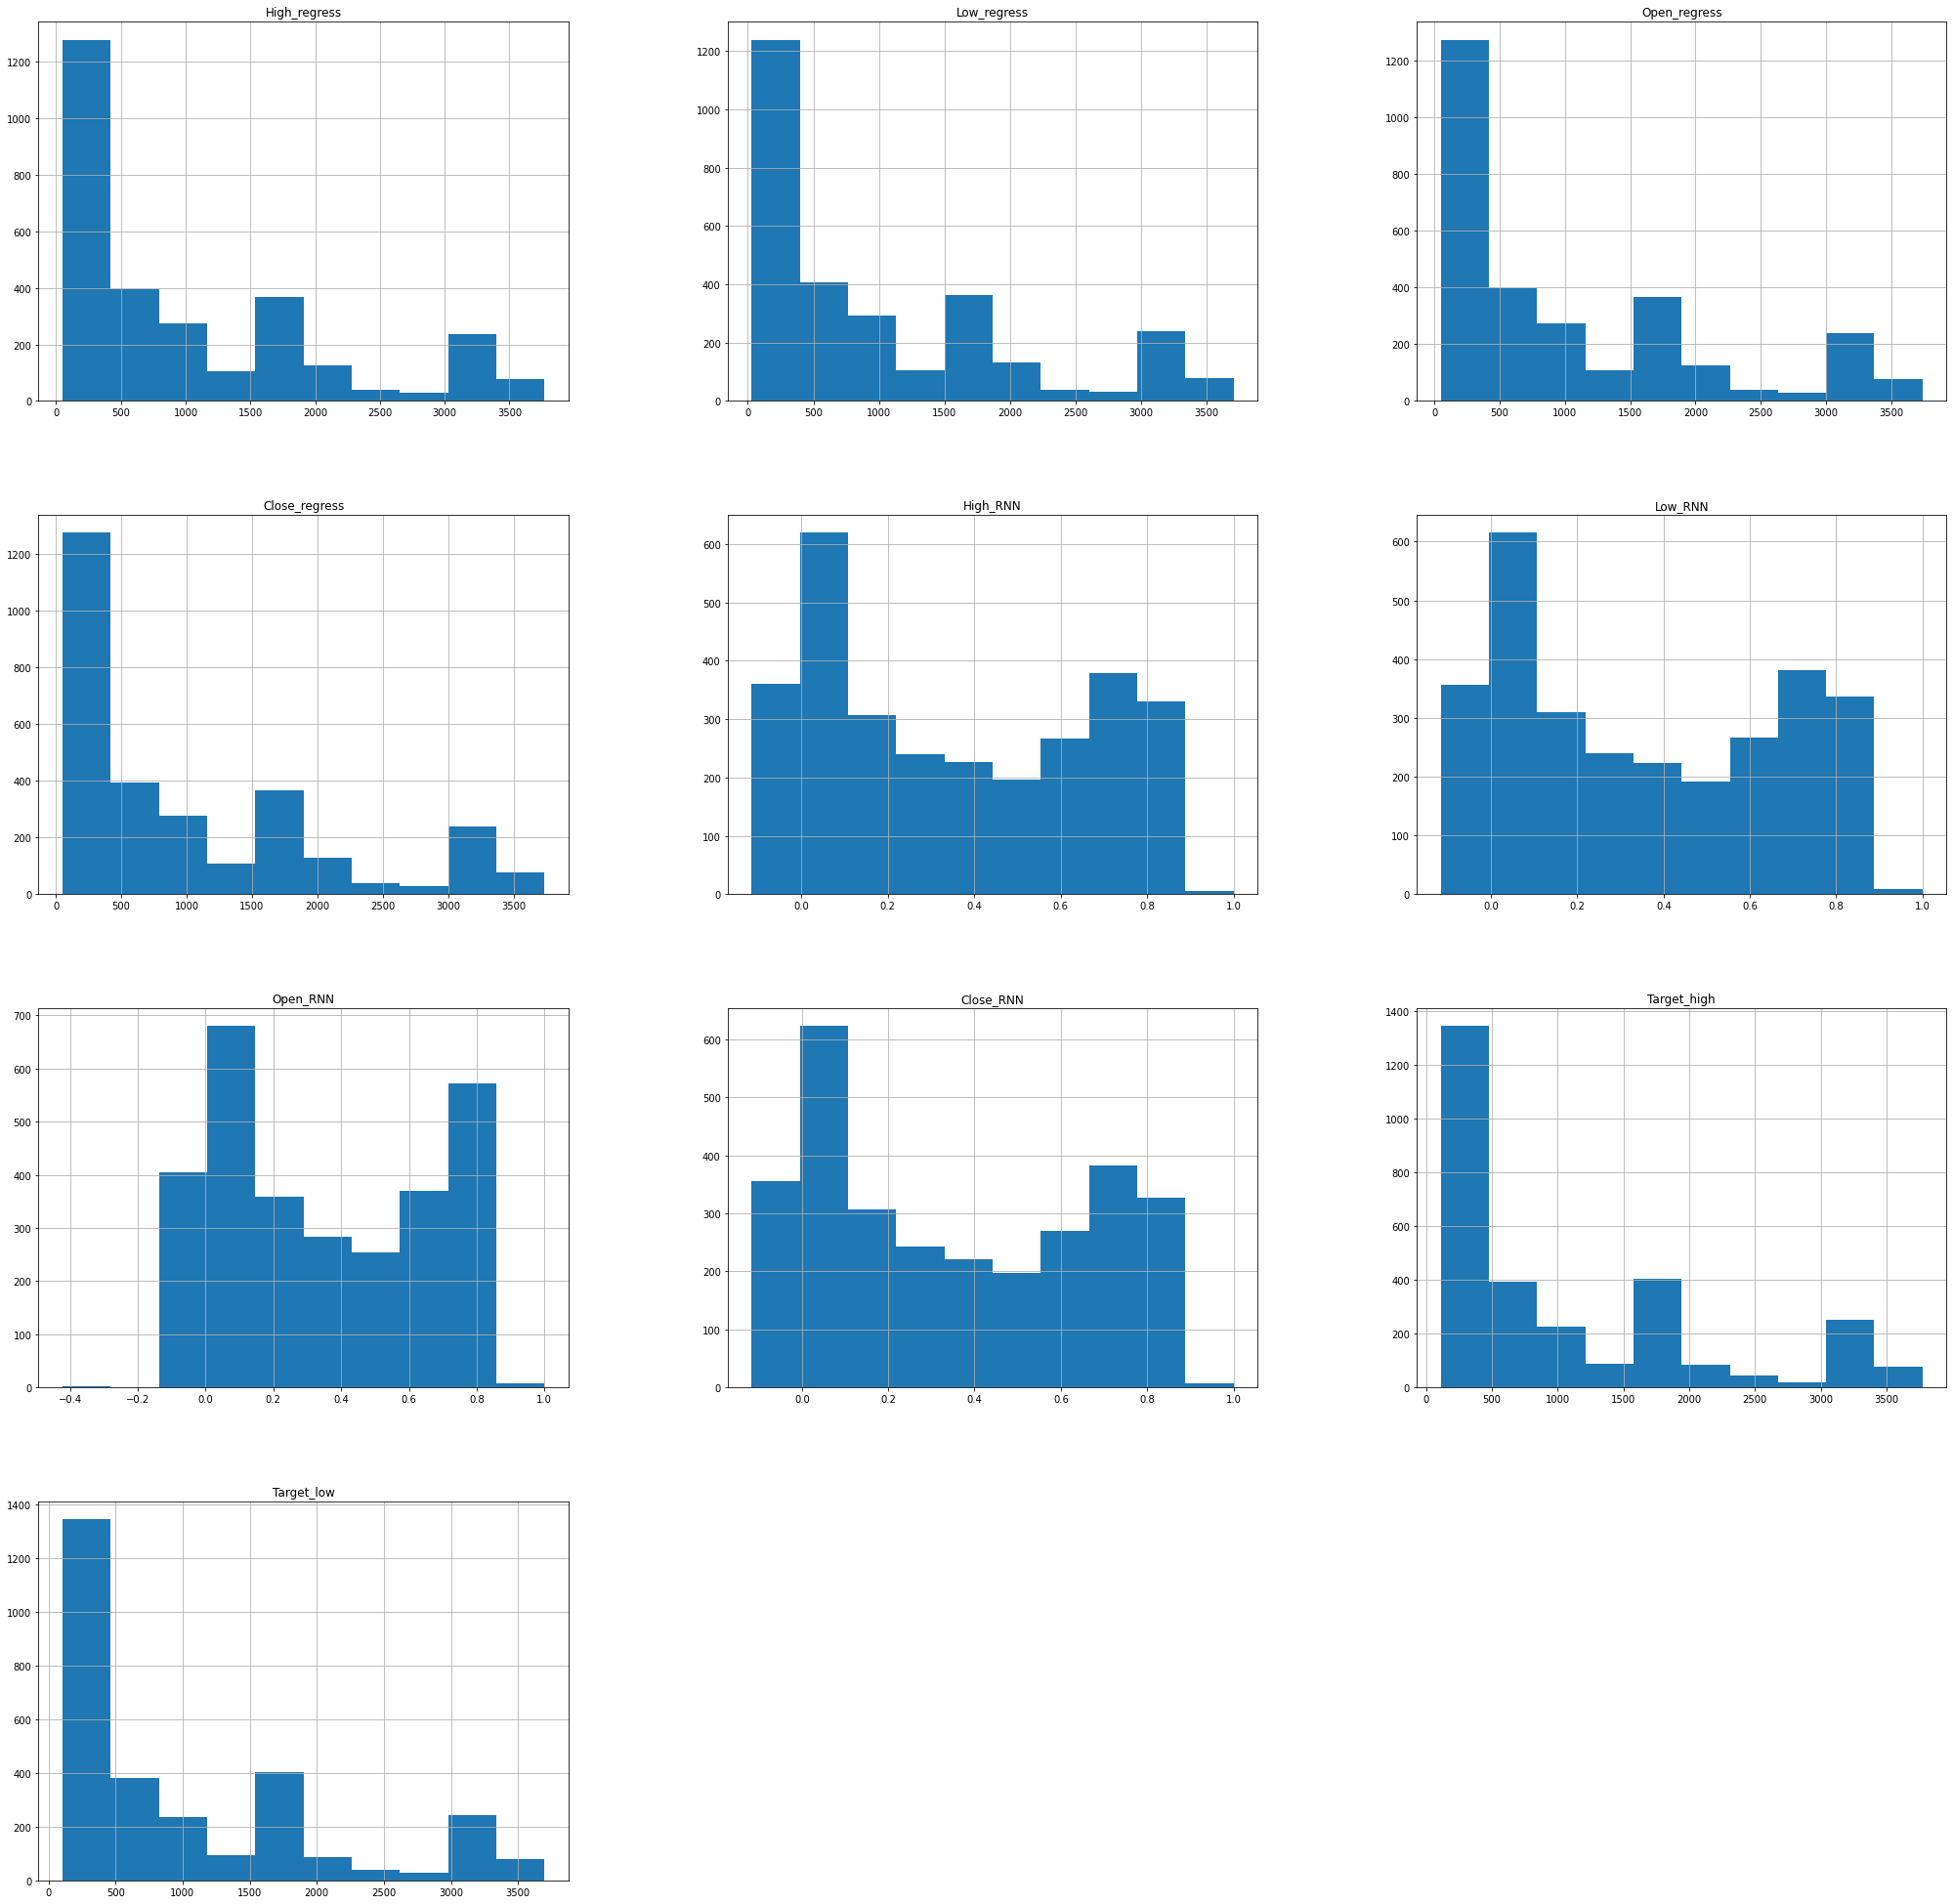

In [90]:
df_main.hist(figsize = (35,35))
plt.show()

In [91]:
y_Df=df_main[['Target_high','Target_low']].values

In [92]:
sc_2 = MinMaxScaler(feature_range = (0, 1))

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Df, y_Df, test_size=0.3)

X_train_scaled=sc_2.fit_transform(X_train)

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 8, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(2, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [98]:
import tensorflow as tf
model_ANN=model()
callback=tf.keras.callbacks.ModelCheckpoint(filepath='ANN_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
with tf.device('/device:GPU:0'):
#with tf.device('/cpu:0'):
    results=model_ANN.fit(X_train,y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                288       
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                                 
Total params: 10,978
Trainable params: 10,978
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
65/65 [==============================] - 1s 6ms/step - loss: 636.9142 - accuracy: 0.1107 - mean_absolute_error: 636.9142
Epoch 2/2000
65/65 [============================

In [99]:
X_test_scaled=sc_2.transform(X_test)
y_pred=model_ANN.predict(X_test)
y_pred

array([[ 259.95334,  254.41261],
       [1800.302  , 1761.7428 ],
       [3395.54   , 3322.7854 ],
       ...,
       [ 304.7425 ,  298.24167],
       [ 778.35016,  761.6972 ],
       [ 752.50275,  736.40393]], dtype=float32)

In [100]:
y_test

array([[ 259.5       ,  253.41999817],
       [1871.48999023, 1851.        ],
       [3337.69995117, 3277.79003906],
       ...,
       [ 310.23001099,  305.        ],
       [ 675.5       ,  665.5       ],
       [ 984.5       ,  966.09997559]])

In [101]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,2):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

In [102]:
df_res=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_test_mod[0],y_test_mod[1])),columns=['Pred_high','Pred_low','Actual_high','Actual_low'])

In [103]:
df_res.head()

,Pred_high,Pred_low,Actual_high,Actual_low
0,259.953339,254.412613,259.500000,253.419998
1,1800.302002,1761.742798,1871.489990,1851.000000
2,3395.540039,3322.785400,3337.699951,3277.790039
3,2620.245850,2564.110107,2722.350098,2626.260010
4,3120.207764,3053.354980,3109.780029,3037.139893


In [104]:
df_res.to_csv('Results.csv',index=False)

In [105]:

df_res_2=df_res[500:600]

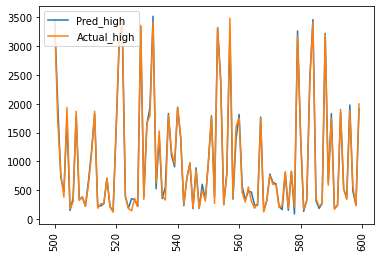

In [106]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

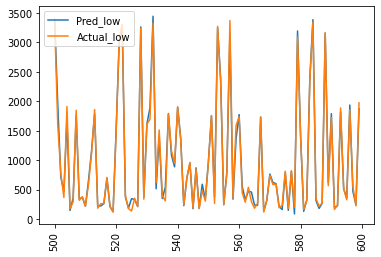

In [107]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

In [108]:

df_res_2=df_res[200:300]

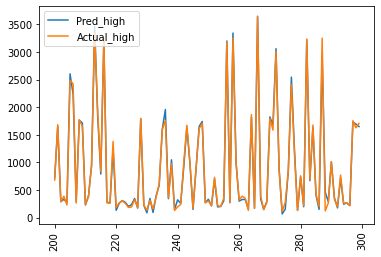

In [109]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

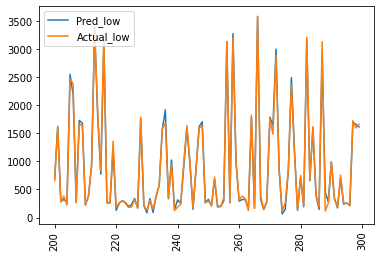

In [110]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

## Low_ANN

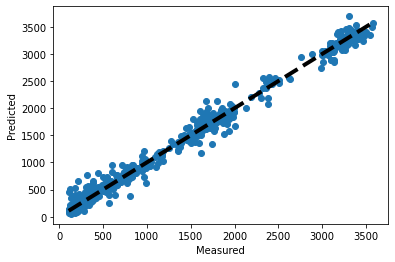

In [111]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## High_ANN

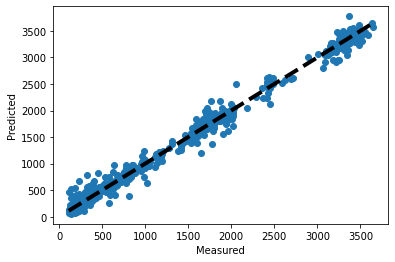

In [112]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()